<a href="https://colab.research.google.com/github/ASUcicilab/GIS322/blob/main/notebook/Module_5_(1)_Geometric_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 Geometric Operations

<br></br>
`geopandas` makes available all the tools for geometric manipulations in the `shapely` library.

<br></br>

Here is a list of supported geometric operations in `geopandas`, most of them can be used on aGeoDataFrame or GeoSeries.


* GeoSeries.buffer(distance): Create a buffer to the shape (point, line, polygon)
* GeoSeries.centroid: Calculate the geometric centroid of a shape
* GeoSeries.area: Calculate the area of a shape
* GeoSeries.length: Calculate the length a shape

In [ ]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

<br></br>
Let's play around with those methods using the US lower 48 states example.

In [ ]:
states = gpd.read_file("US_lower_48.shp")

<Axes: >

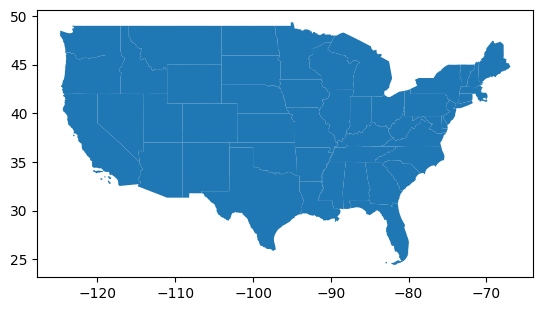

In [ ]:
states.plot()

<br></br>
First of all, let's calculate the centroid of each state.

In [ ]:
states.centroid

<ipython-input-4-0d91e4bd163e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states.centroid


0      POINT (-80.61371 38.64257)
1      POINT (-82.46642 28.47706)
2      POINT (-89.14864 40.12420)
3      POINT (-94.19834 46.34927)
4      POINT (-76.68718 38.94649)
5     POINT (-114.65941 44.38906)
6      POINT (-71.57124 43.68024)
7      POINT (-79.13089 35.52604)
8      POINT (-72.66263 44.07525)
9      POINT (-72.73826 41.57516)
10     POINT (-75.45249 38.99497)
11    POINT (-106.10844 34.42130)
12    POINT (-119.66385 37.21531)
13     POINT (-74.65561 40.11018)
14     POINT (-89.73293 44.63994)
15    POINT (-120.60526 43.94045)
16     POINT (-99.81086 41.52715)
17     POINT (-77.83894 40.89670)
18    POINT (-120.59290 47.41164)
19     POINT (-91.81423 30.90907)
20     POINT (-83.42725 32.63864)
21     POINT (-86.84452 32.75688)
22    POINT (-111.67825 39.32377)
23     POINT (-82.70938 40.41549)
24     POINT (-99.31712 31.44721)
25    POINT (-105.54782 38.99853)
26     POINT (-80.86458 33.87774)
27     POINT (-97.50823 35.58346)
28     POINT (-86.34341 35.84298)
29    POINT (-

<ipython-input-5-38aa87ed335b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states.centroid.plot()


<Axes: >

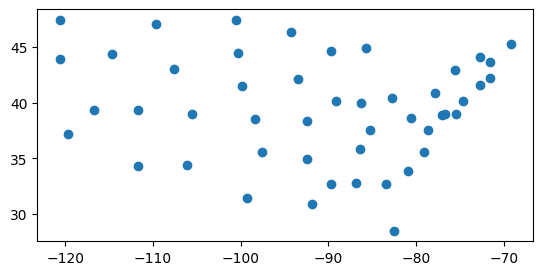

In [ ]:
states.centroid.plot()

<br></br>
Overlay state centroids with the state polygons.

<ipython-input-6-2045d1a0f009>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states.centroid.plot(ax=ax,color="red")


<Axes: >

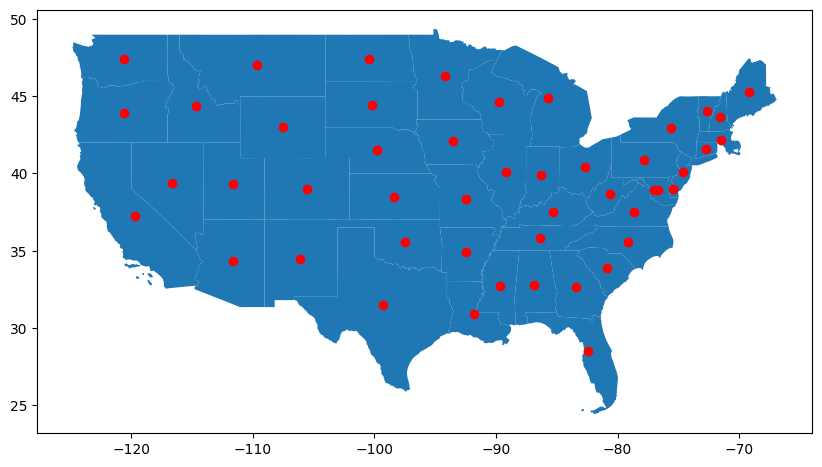

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
states.plot(ax=ax)
states.centroid.plot(ax=ax,color="red")

<br></br>
Then, let's create a buffer to each of the centroid. Before we do that, one important step is to check the projection. If you remember, this one is not projected.

In [ ]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
states_projected = states.to_crs(epsg='3857')

<br></br>
Project it to mercator, so the the buffering distance will be in the unit of meters rather than arc-degree.

In [ ]:
buffers = states_projected.centroid.buffer(distance=200000) #This is a 200 kilometer buffer

<Axes: >

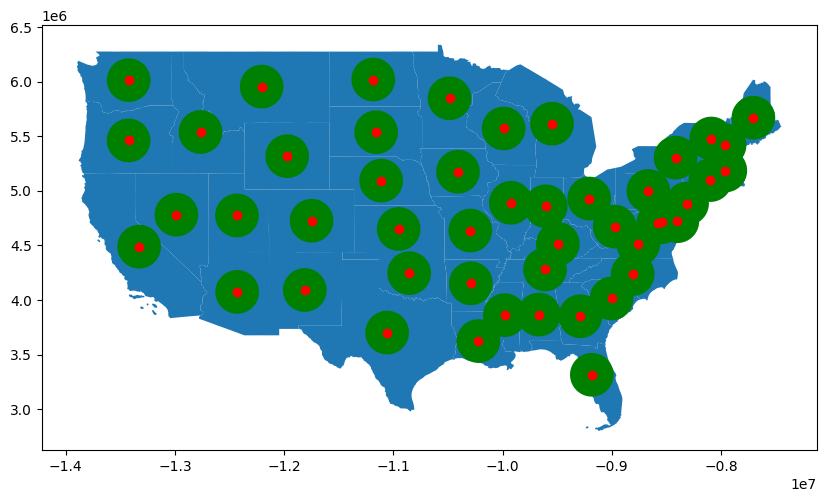

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
states_projected.plot(ax=ax)
buffers.plot(ax=ax,color="green")
states_projected.centroid.plot(ax=ax,color="red")


<br></br>
Then let's calcuate the area and length of each state, and create two new columns in the states GeoDataFrame.




In [ ]:
states_projected['state_area'] = states_projected.area
states_projected['state_length'] = states_projected.length


<br></br>
Let's find out which state has the largest area? Have a guess before running the command?


In [ ]:
states_projected.sort_values('state_area', ascending=False)[['NAME','state_area']]

,NAME,state_area
24,Texas,9.607227e+11
39,Montana,8.201831e+11
12,California,6.718940e+11
35,Michigan,4.997446e+11
15,Oregon,4.919326e+11
34,Nevada,4.802968e+11
29,Wyoming,4.741973e+11
3,Minnesota,4.732057e+11
11,New Mexico,4.644023e+11
25,Colorado,4.473108e+11



<br></br>
Let's find out which state has the largest length (circumference)? Have another guess?

In [ ]:
states_projected.sort_values('state_length', ascending=False)[['NAME','state_length']]

,NAME,state_length
24,Texas,6.845591e+06
12,California,5.257989e+06
39,Montana,4.615753e+06
3,Minnesota,4.510422e+06
5,Idaho,4.197446e+06
35,Michigan,3.795814e+06
1,Florida,3.734787e+06
27,Oklahoma,3.307801e+06
15,Oregon,3.282428e+06
33,New York,3.212606e+06
